In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score
from sklearn.svm import SVC

In [2]:
df= pd.read_csv("emails.csv")

In [3]:
df.shape

(5172, 3002)

In [4]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [5]:
x=df.drop(['Email No.','Prediction'],axis=1)
y=df['Prediction']

In [6]:
x.shape

(5172, 3000)

In [7]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3000 entries, the to dry
dtypes: int64(3000)
memory usage: 118.4 MB


<AxesSubplot:xlabel='Prediction', ylabel='count'>

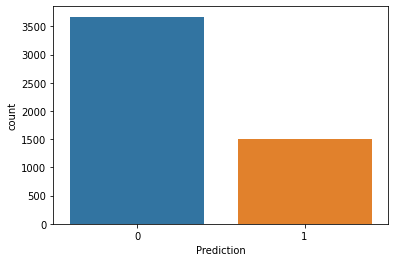

In [8]:
sns.countplot(x=y)

In [9]:
y.value_counts()

0    3672
1    1500
Name: Prediction, dtype: int64

In [10]:
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)
print(x_scaled)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.03809524 0.09848485 0.06705539 ... 0.         0.00877193 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.00952381 0.0530303  0.         ... 0.         0.00877193 0.        ]
 [0.1047619  0.18181818 0.01166181 ... 0.         0.         0.        ]]


In [11]:
x_train,x_test,y_train ,y_test=train_test_split(x_scaled,y,random_state=0,test_size=0.25)

In [12]:
def apply_model(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
    accuracy_score(y_test,y_pred)
    print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90       929
           1       0.70      0.95      0.81       364

    accuracy                           0.87      1293
   macro avg       0.84      0.89      0.85      1293
weighted avg       0.90      0.87      0.88      1293



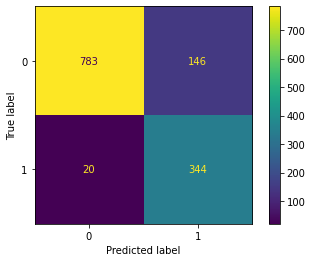

In [13]:
#KNN
knn=KNeighborsClassifier(n_neighbors=5)
apply_model(knn)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       929
           1       0.95      0.97      0.96       364

    accuracy                           0.98      1293
   macro avg       0.97      0.97      0.97      1293
weighted avg       0.98      0.98      0.98      1293



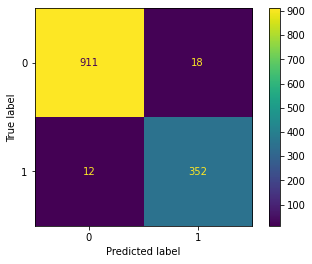

In [14]:
#SVM
svm=SVC(kernel='linear')
apply_model(svm)